In [2]:
library(tidyverse) # ggplot(.)
library(car) # vif(.)
library(lawstat) # runs.test(.)


Attaching package: ‘lawstat’


The following object is masked from ‘package:car’:

    levene.test




In [3]:
df <- read.csv("./HornsRev.csv")
# Set Impact as factor
df$Impact <- as.factor(df$Impact)

In [4]:
glmFitOD2 <- glm(Nhat ~ Impact + Depth + XPos + YPos,
offset=log(Area), family=quasipoisson, data=df)

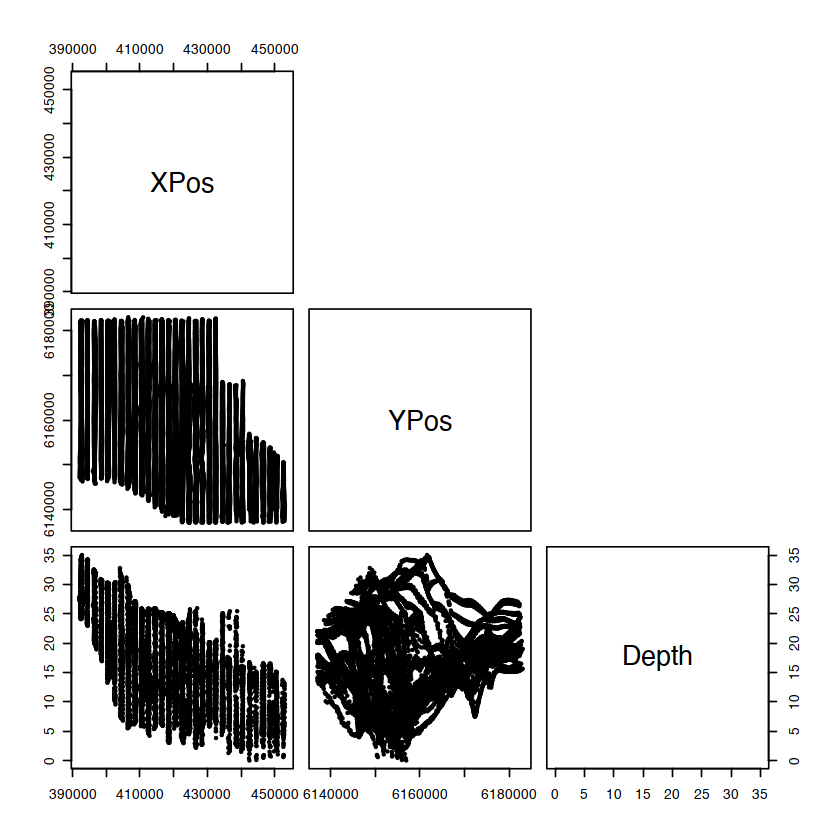

In [5]:
covariates <- c("XPos", "YPos", "Depth")
pairs(subset(df, select=covariates),
upper.panel=NULL, pch=19, cex=0.3)

In [7]:
round(vif(glmFitOD2), 2)

Impact  Depth   XPos   YPos 
  1.00   1.39   1.70   1.33

In [8]:
glmFitOD3 <- glm(Nhat ~ Impact*XPos + Impact*YPos + Depth,
offset=log(Area), family=quasipoisson, data=df)

In [9]:
round(vif(glmFitOD3))

Impact        XPos        YPos       Depth Impact:XPos Impact:YPos 
     501530           3           3           1        1342      475868

In [10]:
xmatrix <- model.matrix(glmFitOD3)
# which is equivalent to
xmatrix <- model.matrix(~Impact*XPos + Impact*YPos + Depth, data=df)
head(xmatrix)

,(Intercept),Impact1,XPos,YPos,Depth,Impact1:XPos,Impact1:YPos
1,1,0,392441.6,6182144,26.76,0,0
2,1,0,392405.3,6181709,26.94,0,0
3,1,0,392397.7,6181209,27.09,0,0
4,1,0,392409.9,6180709,27.19,0,0
5,1,0,392433.2,6180210,27.24,0,0
6,1,0,392445.2,6179710,27.26,0,0


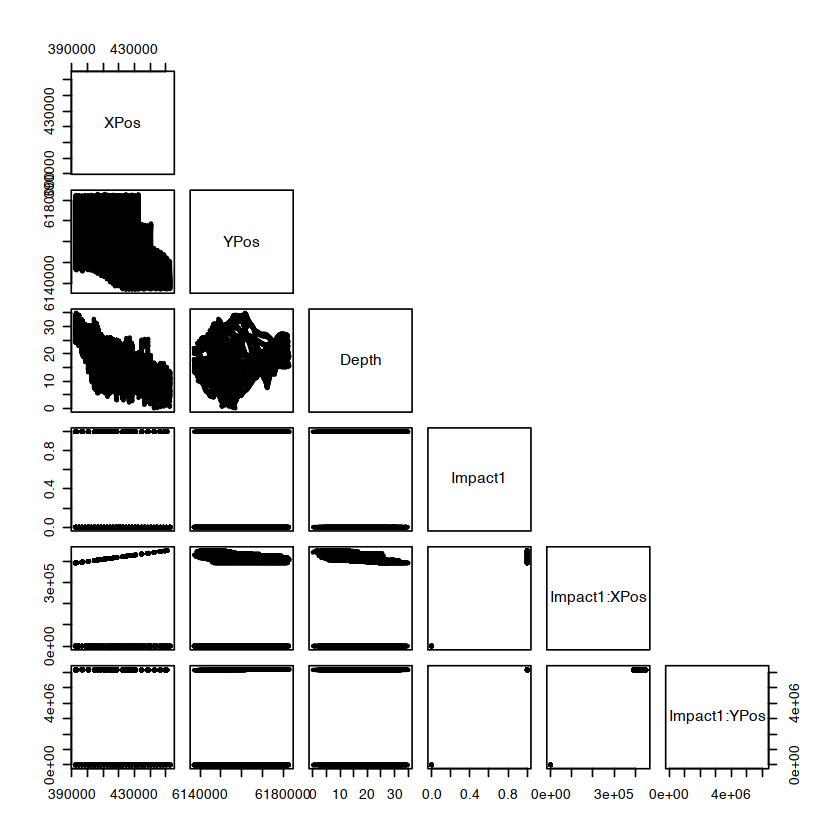

In [11]:
covariates <- c("XPos", "YPos", "Depth", "Impact1",
"Impact1:XPos", "Impact1:YPos")
pairs(subset(xmatrix, select=covariates),
upper.panel=NULL, pch=19, cex=0.3)

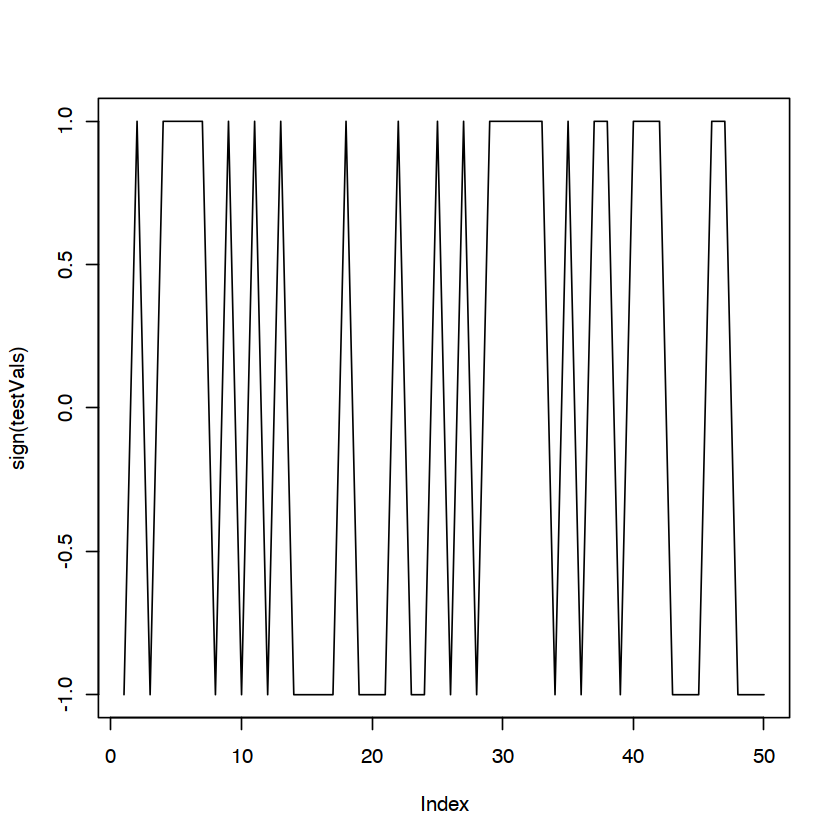

In [24]:
set.seed(101) # for reproducibility
testVals <- rnorm(50)
plot(sign(testVals), type="l")

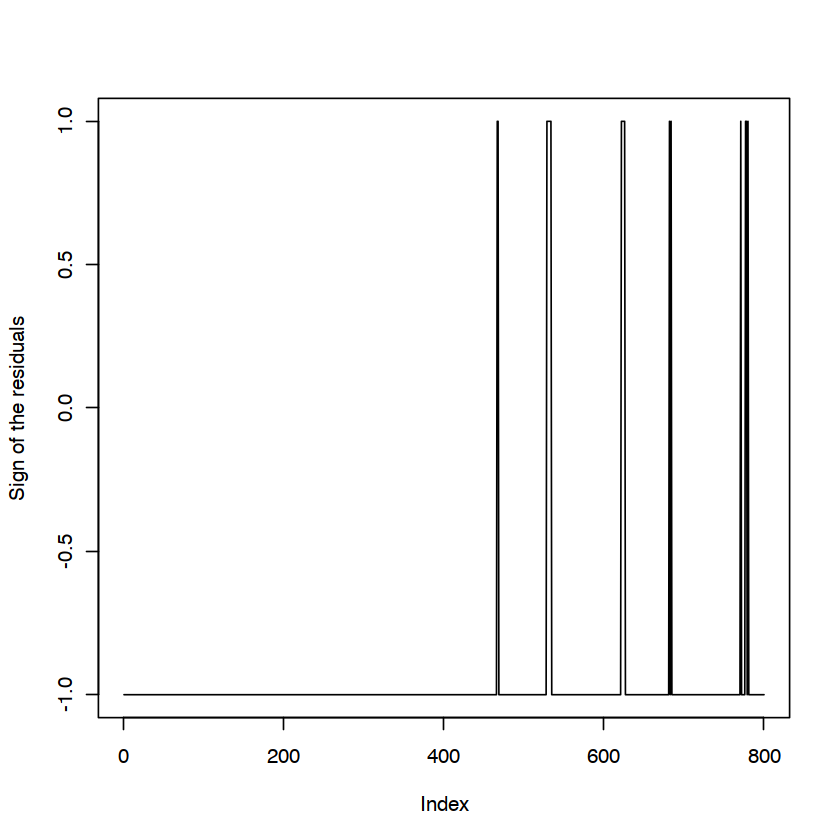

In [25]:
plot(sign(residuals(glmFitOD3, type="pearson")[1:800]),
type="l", ylab="Sign of the residuals")

In [26]:
lawstat::runs.test(residuals(glmFitOD3, type="pearson"))


	Runs Test - Two sided

data:  residuals(glmFitOD3, type = "pearson")
Standardized Runs Statistic = -122.81, p-value < 2.2e-16


In [29]:
lawstat::runs.test(residuals(glmFitOD3, type="pearson")[order(df$Depth)])


	Runs Test - Two sided

data:  residuals(glmFitOD3, type = "pearson")[order(df$Depth)]
Standardized Runs Statistic = -66.63, p-value < 2.2e-16


In [30]:
lawstat::runs.test(residuals(glmFitOD3, type="pearson")[order(df$XPos)])


	Runs Test - Two sided

data:  residuals(glmFitOD3, type = "pearson")[order(df$XPos)]
Standardized Runs Statistic = -35.724, p-value < 2.2e-16


In [31]:
require(tidyverse)

In [33]:
new_df = df %>% arrange(Depth)

In [34]:
glmFitOD3_new <- glm(Nhat ~ Impact*XPos + Impact*YPos + Depth,
offset=log(Area), family=quasipoisson, data=new_df)

In [38]:
lawstat::runs.test(residuals(glmFitOD3_new, type="pearson"))


	Runs Test - Two sided

data:  residuals(glmFitOD3_new, type = "pearson")
Standardized Runs Statistic = -66.63, p-value < 2.2e-16


In [39]:
lawstat::runs.test(residuals(glmFitOD3, type="pearson")[order(df$YPos)])


	Runs Test - Two sided

data:  residuals(glmFitOD3, type = "pearson")[order(df$YPos)]
Standardized Runs Statistic = -6.2915, p-value = 3.144e-10
